## <span style='color: blue;'>NLP Project - Team 4</span>
### Title:
#### <span style='color: red;'>Enhanced Airline Customer Experience through Sentiment Driven Topic Modeling and Actionable Insights.</span>
### Team members:
1. Suvarna Sangram Aglave
2. Deekshitha Gona

In [2]:
#import required libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
reviews_data=pd.read_csv('BA_Airline_Reviews.csv')
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3701 non-null   int64  
 1   OverallRating          3696 non-null   float64
 2   ReviewHeader           3701 non-null   object 
 3   Name                   3701 non-null   object 
 4   Datetime               3701 non-null   object 
 5   VerifiedReview         3701 non-null   bool   
 6   ReviewBody             3701 non-null   object 
 7   TypeOfTraveller        2930 non-null   object 
 8   SeatType               3699 non-null   object 
 9   Route                  2926 non-null   object 
 10  DateFlown              2923 non-null   object 
 11  SeatComfort            3585 non-null   float64
 12  CabinStaffService      3574 non-null   float64
 13  GroundService          2855 non-null   float64
 14  ValueForMoney          3700 non-null   float64
 15  Reco

In [4]:
reviews_data.describe()

,Unnamed: 0,OverallRating,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment,Wifi&Connectivity
count,3701.000000,3696.000000,3585.000000,3574.000000,2855.000000,3700.000000,3315.000000,2551.000000,609.000000
mean,1850.000000,4.734307,2.875314,3.254057,2.784238,2.688378,2.713122,2.646021,1.924466
std,1068.531001,3.175306,1.362081,1.489709,1.457058,1.471887,1.437092,1.398509,1.352705
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,925.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1850.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,2775.000000,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,3700.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
reviews_data.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [6]:
reviews_data.isna().sum()

Unnamed: 0                  0
OverallRating               5
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

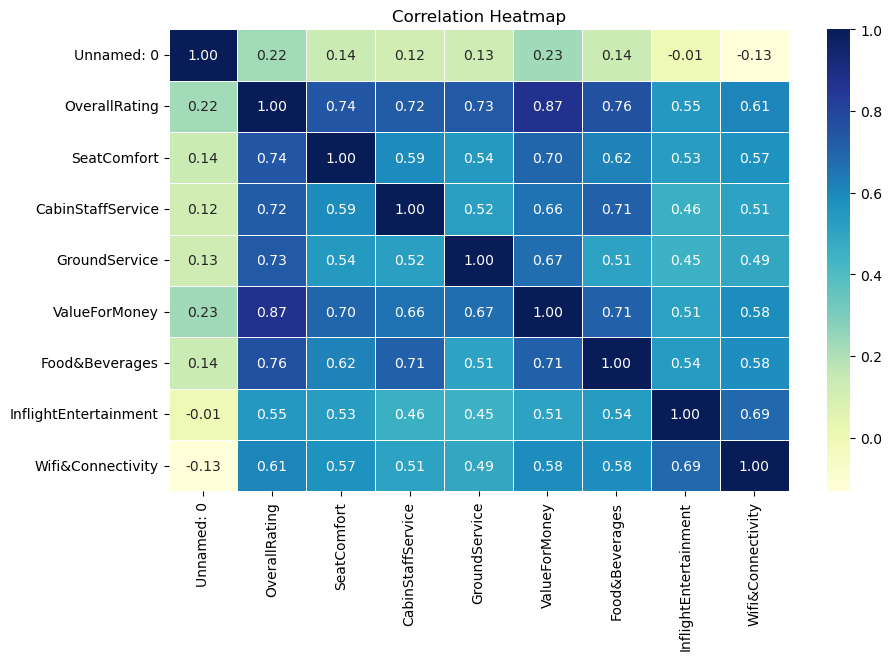

In [7]:
#compute correlation matrix
num_cols=reviews_data.select_dtypes(include=['number']).columns
corr_matrix = reviews_data[num_cols].corr()

#plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
#drop irrelevant columns like Unnamed: 0, Datetime, VerifiedReview, TypeOfTraveller, Route, Aircraft, DateFlown
reviews_data.drop(columns=['Unnamed: 0', 'Name', 'Datetime', 'VerifiedReview', 'TypeOfTraveller', 'Route', 'Aircraft', 'DateFlown'], inplace=True)

In [9]:
#as we can see column Wifi&Connectivity has huge number of missing values so we drop that column
reviews_data.drop(columns=['Wifi&Connectivity'], inplace=True)

In [10]:
def visualize_numerical_cols(df):
    num_cols=df.select_dtypes(include=['number']).columns
    df[num_cols].hist(figsize=(12,8), bins=20, color='orange', edgecolor='black')
    plt.suptitle('Distribution of data for review columns')
    plt.show()

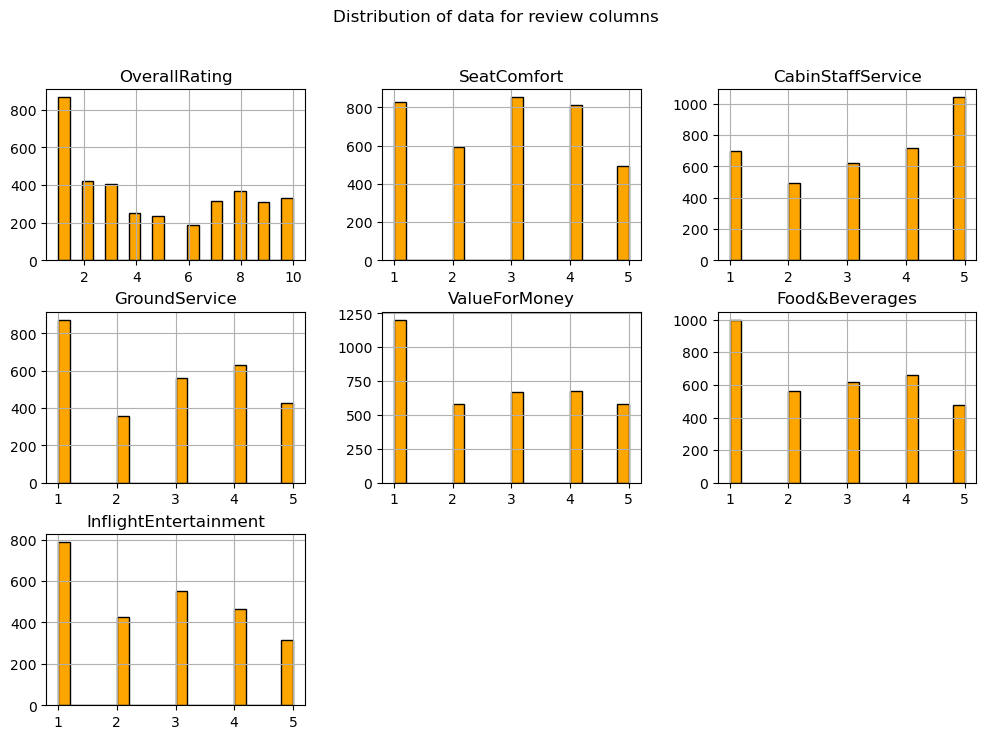

In [11]:
visualize_numerical_cols(reviews_data)

In [12]:

#as we can seethe  data distribution for the above numerical columns is normal or skewed
#if data is skewed, we will use median else we will use mean
num_cols=reviews_data.select_dtypes(include=['number']).columns
for feat in num_cols:
    if reviews_data[feat].skew() > 1: #use median if data is skewed
        reviews_data[feat]=reviews_data[feat].fillna(reviews_data[feat].median())
    else:
        reviews_data[feat]=reviews_data[feat].fillna(reviews_data[feat].mean())

# Round numerical columns to the nearest integer
for col in num_cols:
    reviews_data[col] = reviews_data[col].round(0).astype(int)

reviews_data[num_cols].isna().sum()


OverallRating            0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Food&Beverages           0
InflightEntertainment    0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_cat_columns(df):
    cat_cols = ['SeatType', 'Recommended']
    for col in cat_cols:
        plt.figure(figsize=(8, 4))
        ax = sns.countplot(
            y=df[col],
            order=df[col].value_counts().index,
            palette="viridis"
        )
        plt.title(f"Distribution of {col}")
        plt.xlabel("Count")

        # Add count labels manually
        for p in ax.patches:
            count = int(p.get_width())
            y = p.get_y() + p.get_height() / 2
            if count < df.shape[0] * 0.05:
                # Small bars: label outside
                ax.text(p.get_width() + 1, y, str(count), va='center')
            else:
                # Large bars: label inside
                ax.text(p.get_width() - 5, y, str(count), va='center', ha='right', color='white', fontweight='bold')

        plt.tight_layout()
        plt.show()


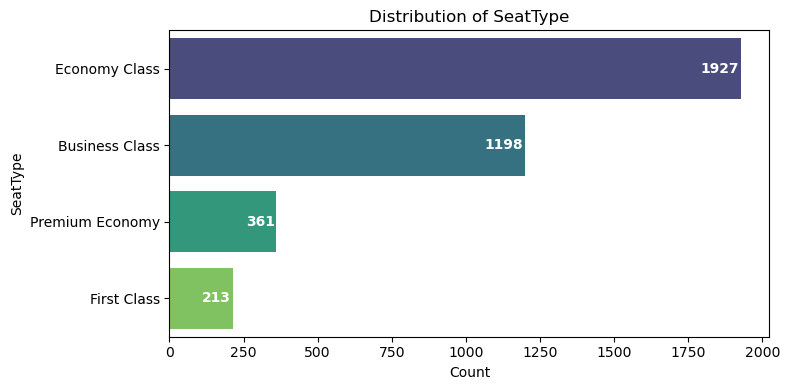

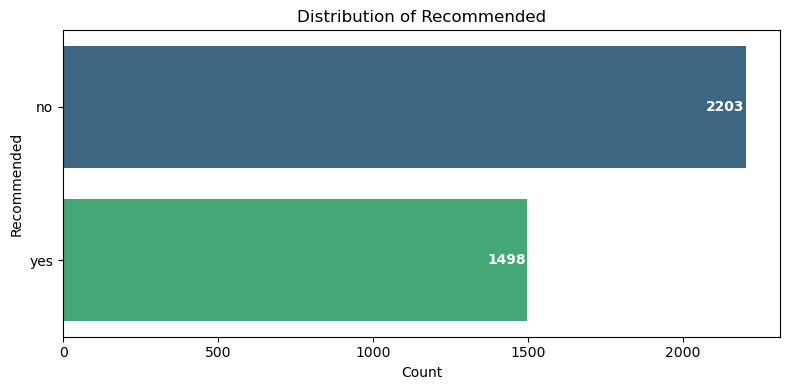

In [14]:
visualize_cat_columns(reviews_data)

In [15]:
#fill categorical column 'SeatType' values with mode imputation for missing data
reviews_data['SeatType']=reviews_data['SeatType'].fillna(reviews_data['SeatType'].mode()[0])

reviews_data['SeatType'].isna().sum()

0

In [16]:
reviews_data.isna().sum()

OverallRating            0
ReviewHeader             0
ReviewBody               0
SeatType                 0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Food&Beverages           0
InflightEntertainment    0
dtype: int64

In [17]:
#convert 'Recommended' column to binary (yes=1, no=0)
reviews_data['Recommended'] = reviews_data['Recommended'].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)

In [18]:
reviews_data.head()

,OverallRating,ReviewHeader,ReviewBody,SeatType,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment
0,1,"""Service level far worse then Ryanair""",4 Hours before takeoff we received a Mail stat...,Economy Class,1,1,1,1,0,3,3
1,3,"""do not upgrade members based on status""",I recently had a delay on British Airways from...,Economy Class,2,3,1,2,0,1,2
2,8,"""Flight was smooth and quick""","Boarded on time, but it took ages to get to th...",Business Class,3,3,4,3,1,4,3
3,1,"""Absolutely hopeless airline""","5 days before the flight, we were advised by B...",Economy Class,3,3,1,1,0,3,3
4,1,"""Customer Service is non existent""","We traveled to Lisbon for our dream vacation, ...",Economy Class,1,1,1,1,0,1,1


In [19]:
#export cleaned dataset
reviews_data.to_csv("BA_Airline_Reviews_Cleaned.csv", index=False)

print("Missing values handled and dataset saved as 'BA_Airline_Reviews_Cleaned.csv'")

Missing values handled and dataset saved as 'BA_Airline_Reviews_Cleaned.csv'
